Generating base (baseline) trend plots...


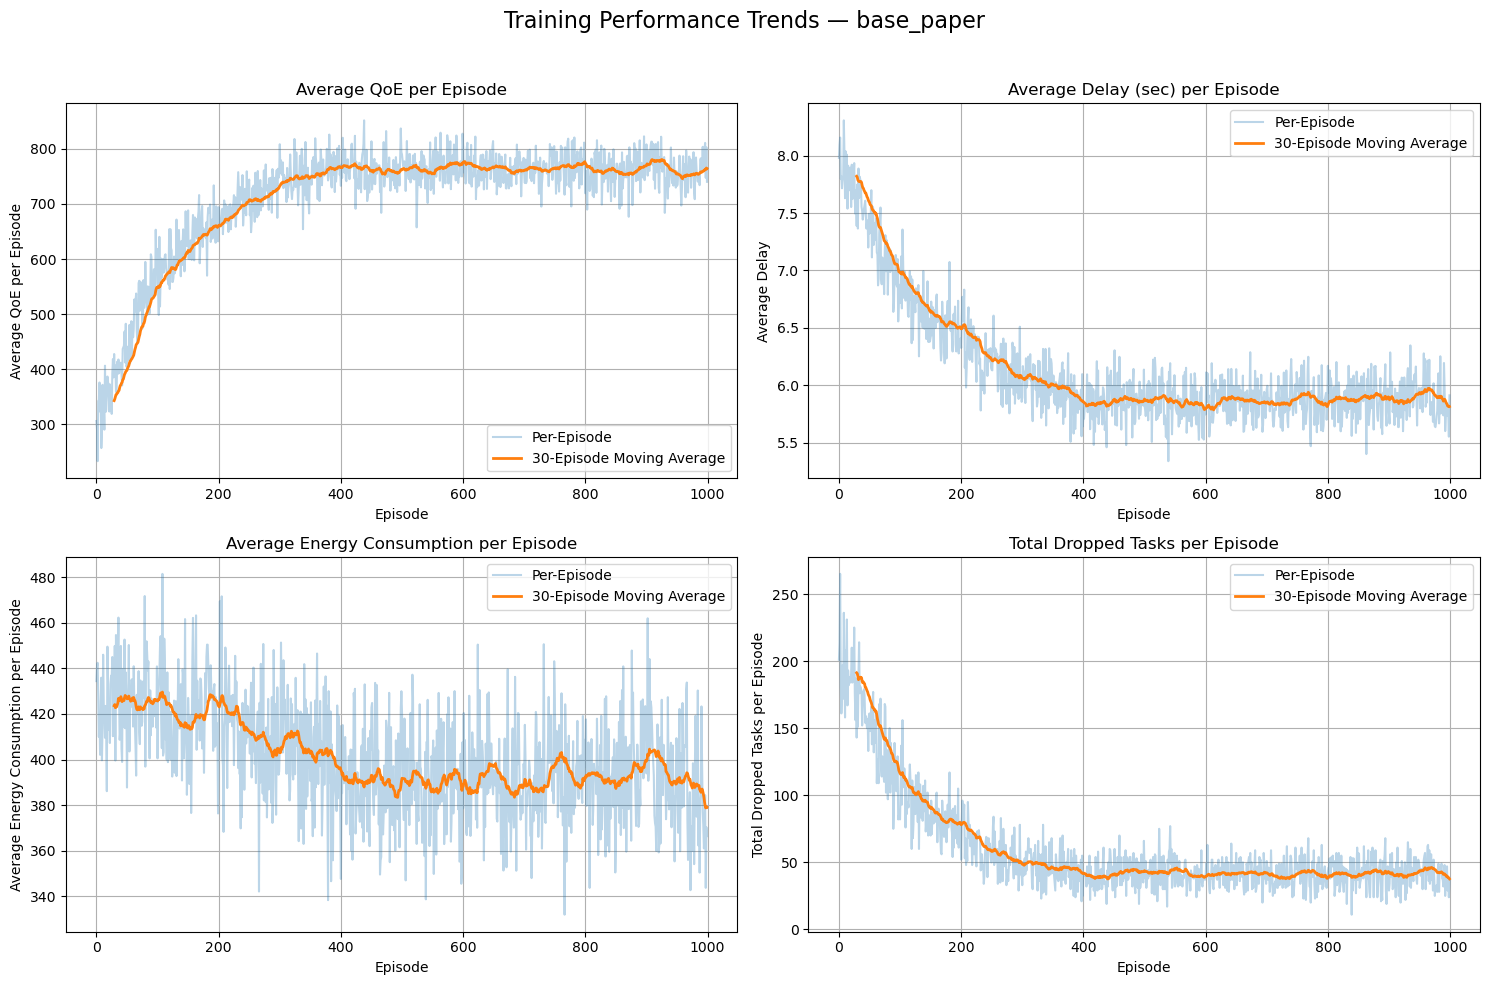

Generating changeLR trend plots (with base overlay)...


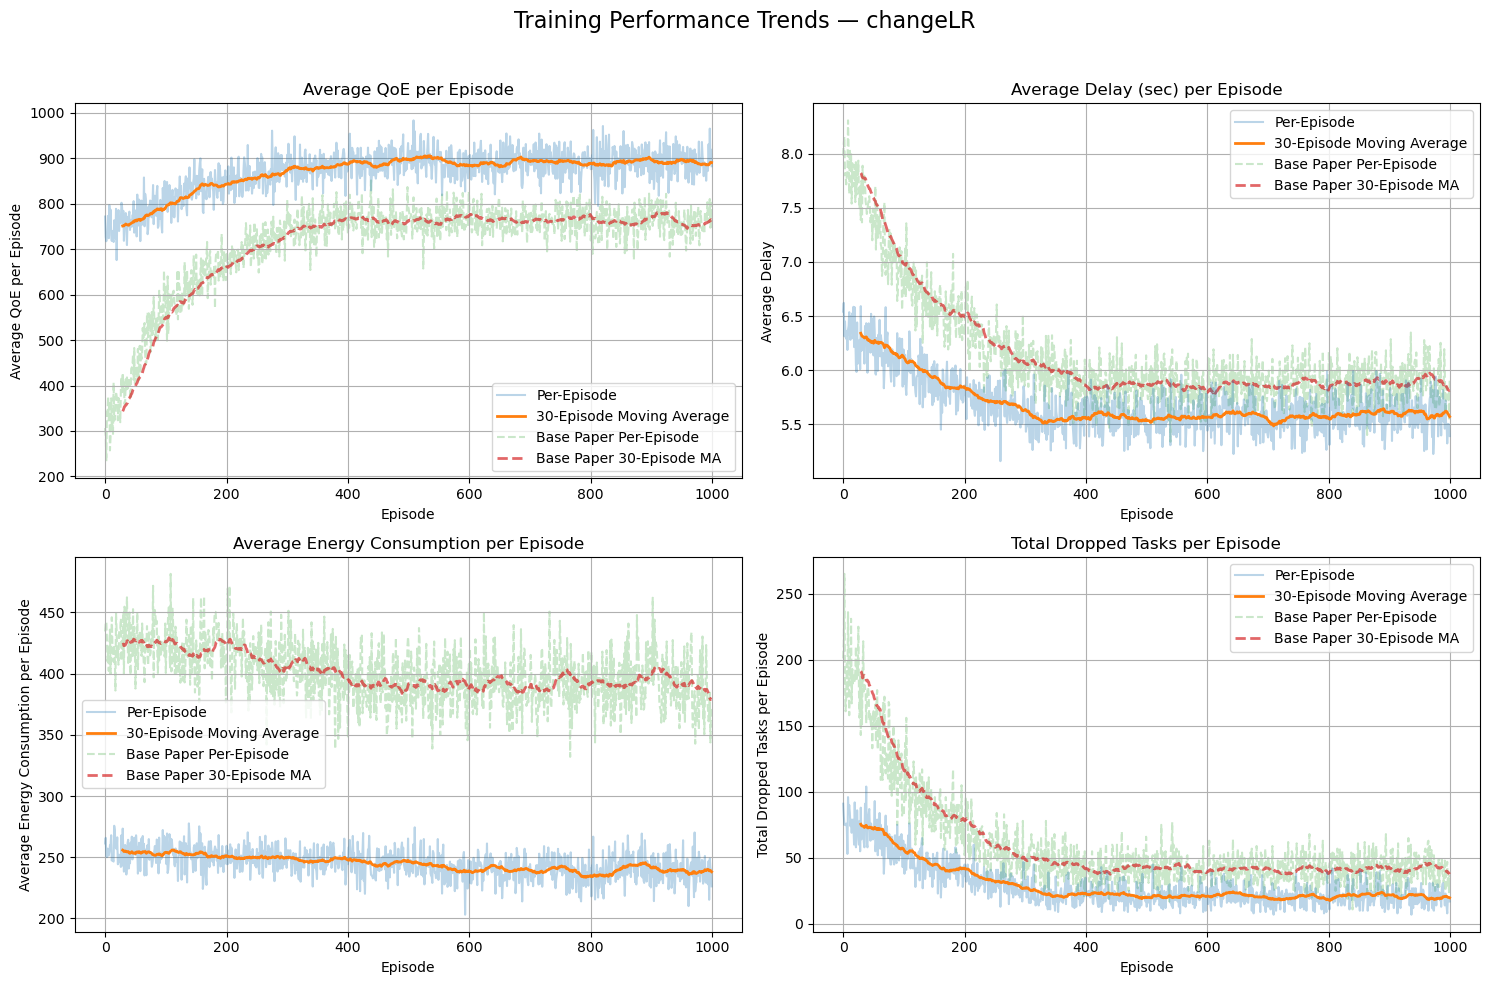

Generating adding_noise trend plots (with base overlay)...


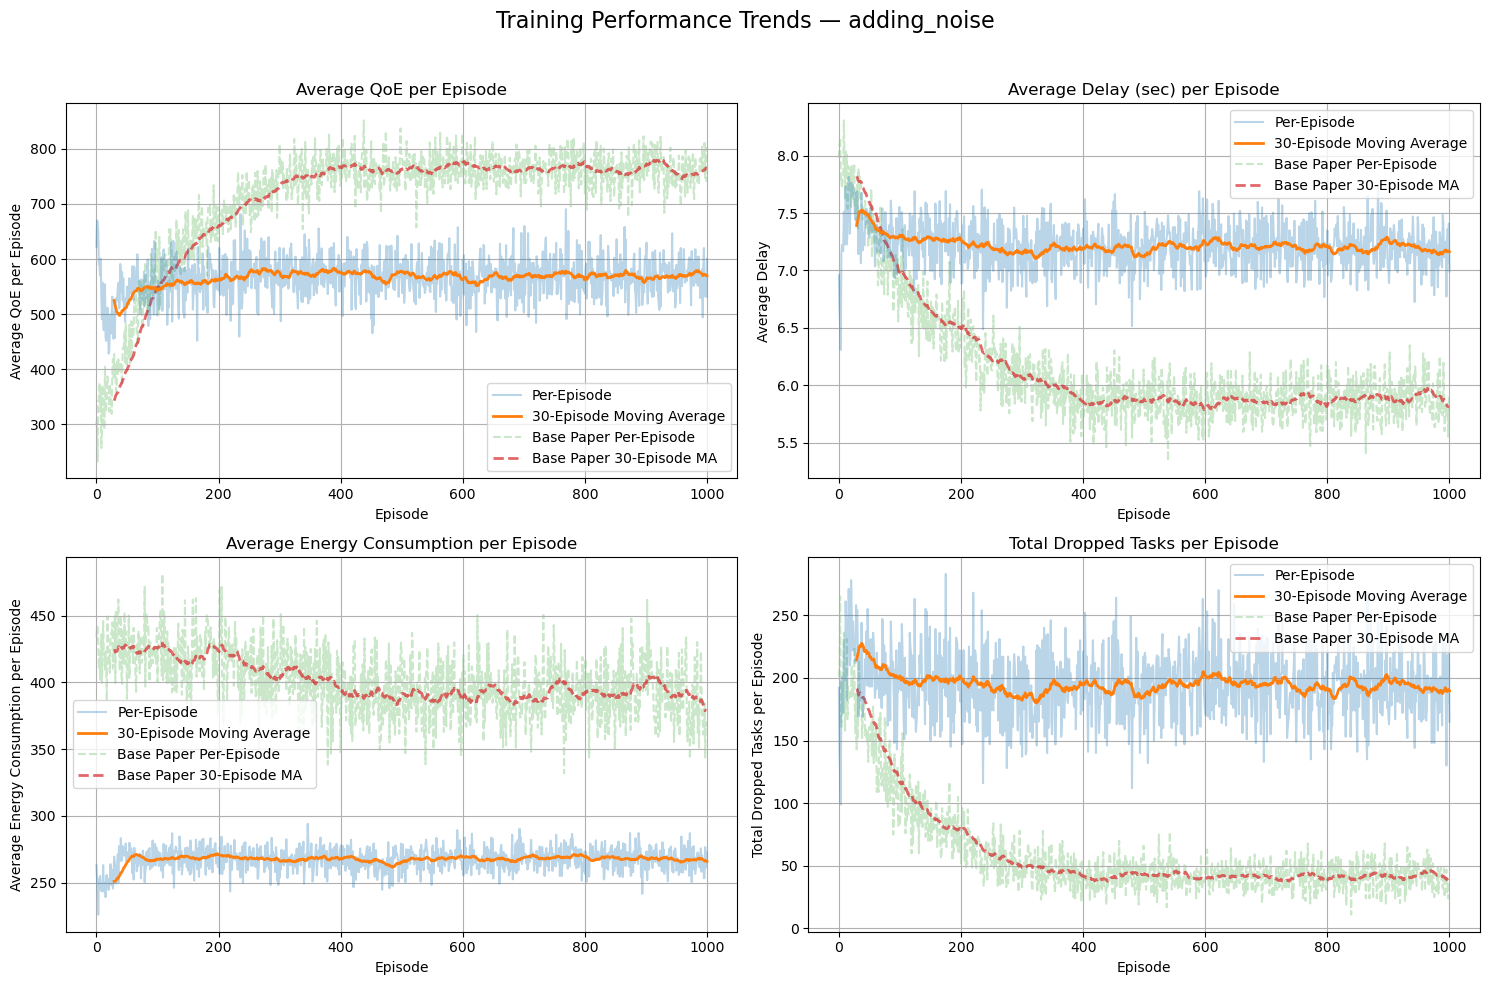

Generating adding_PER trend plots (with base overlay)...


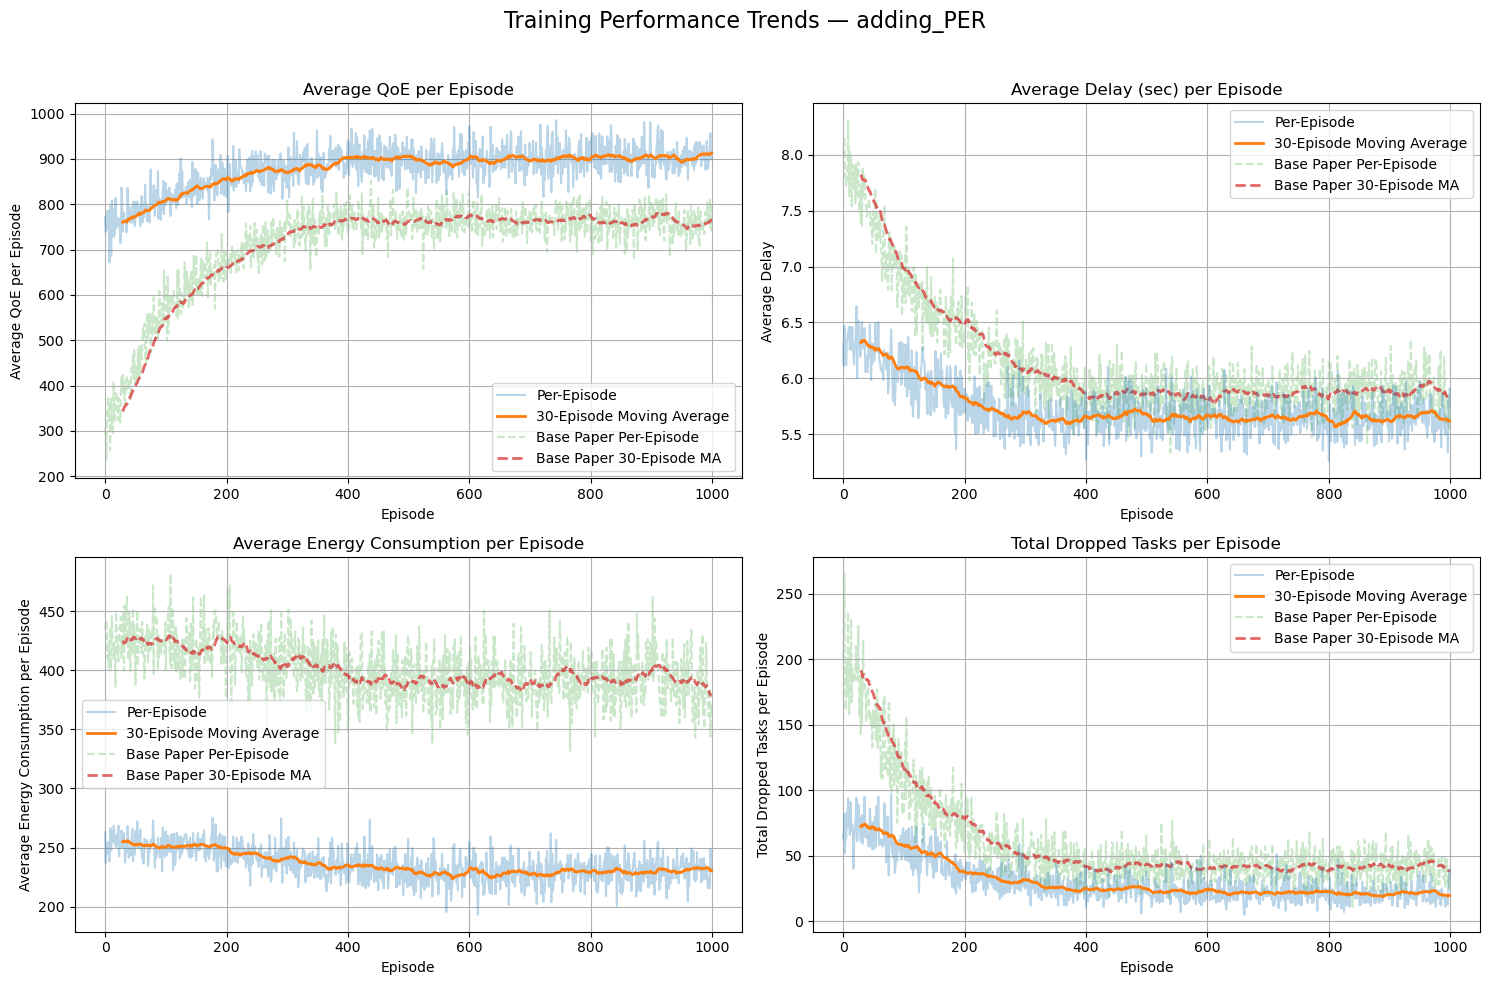

Generating reward_change trend plots (with base overlay)...


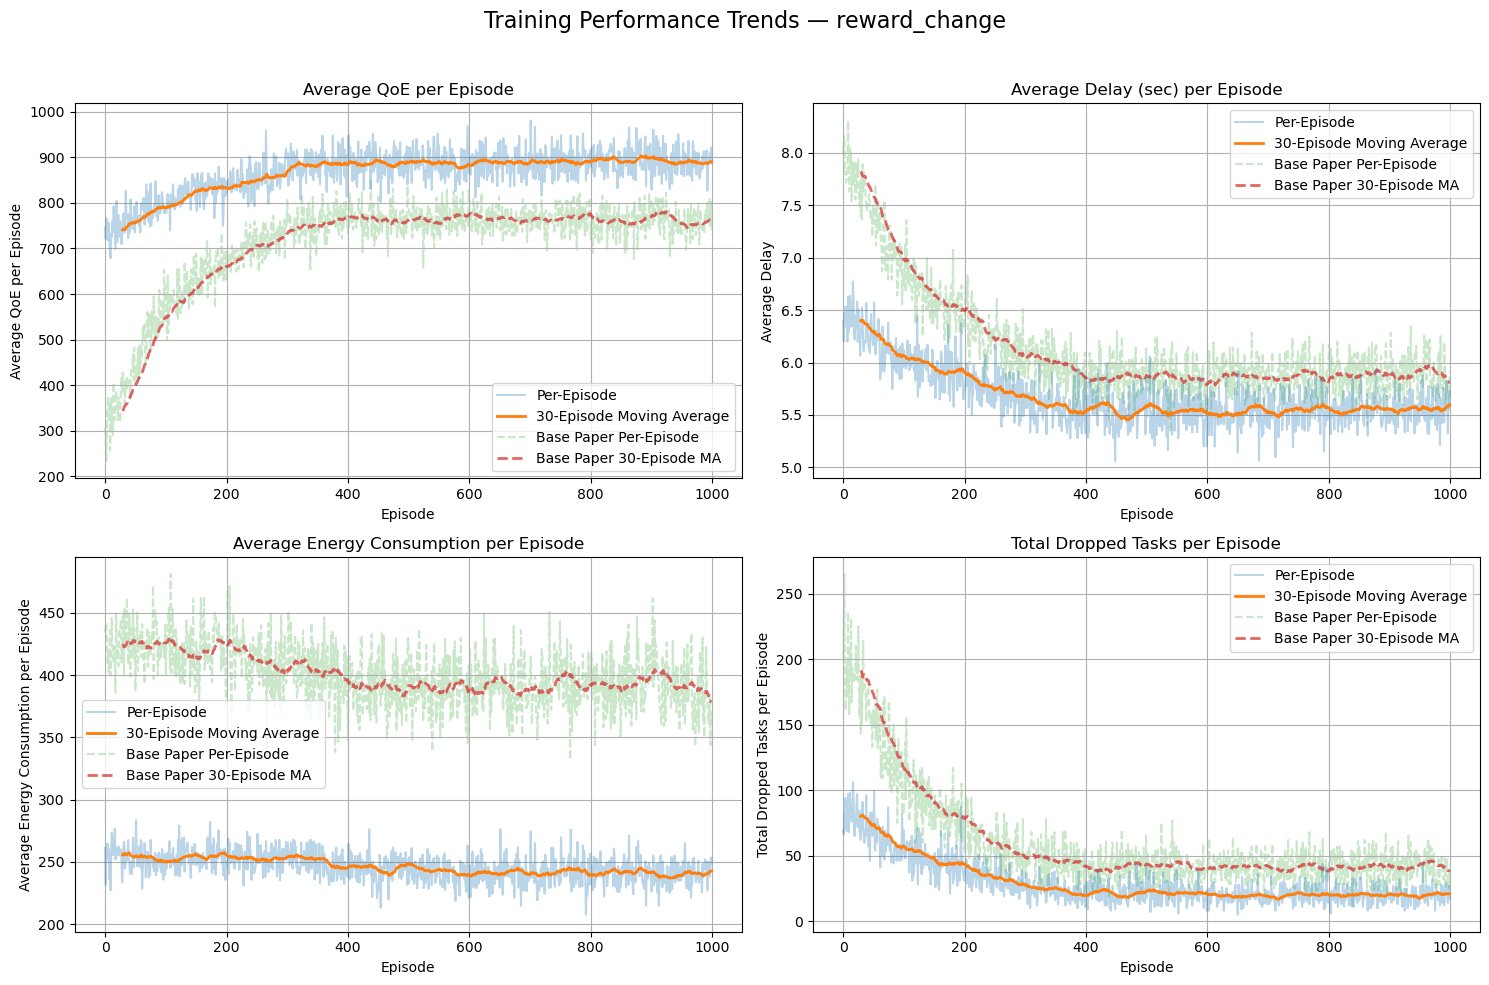

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_trends(data, titles, dataset_name='dataset', base_data=None, baseline_label='Base Paper'):
    """
    Plots the raw per-episode trend and a smoothed moving average trend.
    If base_data is provided and dataset_name != 'base', overlays the base curves
    for easy comparison.
    Saves one PNG per metric and one combined PNG for the whole figure.
    """
    WINDOW_SIZE = 30

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Training Performance Trends — {dataset_name}', fontsize=16)
    axes = axes.flatten()

    for i, (metric, values) in enumerate(data.items()):
        episodes = np.arange(len(values))
        moving_avg = pd.Series(values).rolling(window=WINDOW_SIZE).mean()

        # main dataset curves (the dataset passed in)
        axes[i].plot(episodes, values, label='Per-Episode', alpha=0.3, zorder=3)
        axes[i].plot(episodes, moving_avg, label=f'{WINDOW_SIZE}-Episode Moving Average', linewidth=2, zorder=4)

        # overlay base dataset if provided and we're not plotting the base itself
        if base_data is not None and dataset_name.lower() not in ('base', 'base_paper'):
            if metric in base_data:
                base_vals = np.asarray(base_data[metric])
                base_eps = np.arange(len(base_vals))
                base_mavg = pd.Series(base_vals).rolling(window=WINDOW_SIZE).mean()

                # plot base with dashed lines and lighter alpha so it doesn't dominate
                axes[i].plot(base_eps, base_vals, linestyle='--', label=f'{baseline_label} Per-Episode', alpha=0.25, zorder=1)
                axes[i].plot(base_eps, base_mavg, linestyle='--', linewidth=2, label=f'{baseline_label} {WINDOW_SIZE}-Episode MA', alpha=0.7, zorder=2)

        axes[i].set_title(titles.get(metric, metric))
        axes[i].set_xlabel('Episode')
        axes[i].set_ylabel(titles.get(metric, metric).split('(')[0].strip())
        axes[i].legend()
        axes[i].grid(True)

        # save each metric separately for convenience (filename-safe)
        metric_safe = metric.replace('/', '_').replace(' ', '_')
        folder = "plots"
        os.makedirs(folder, exist_ok=True)
        single_fig_path = os.path.join(folder, f"performance_trends_{dataset_name}_{metric_safe}.png")
        # create small figure for single metric saving
        fig_single, ax_single = plt.subplots(figsize=(10,5))
        # replay the lines on the smaller figure
        ax_single.plot(episodes, values, label='Per-Episode', alpha=0.3)
        ax_single.plot(episodes, moving_avg, label=f'{WINDOW_SIZE}-Episode Moving Average', linewidth=2)
        if base_data is not None and dataset_name.lower() not in ('base', 'base_paper') and metric in base_data:
            base_vals = np.asarray(base_data[metric])
            base_eps = np.arange(len(base_vals))
            base_mavg = pd.Series(base_vals).rolling(window=WINDOW_SIZE).mean()
            ax_single.plot(base_eps, base_vals, linestyle='--', label=f'{baseline_label} Per-Episode', alpha=0.25)
            ax_single.plot(base_eps, base_mavg, linestyle='--', linewidth=2, label=f'{baseline_label} {WINDOW_SIZE}-Episode MA', alpha=0.7)

        ax_single.set_title(titles.get(metric, metric))
        ax_single.set_xlabel('Episode')
        ax_single.set_ylabel(titles.get(metric, metric).split('(')[0].strip())
        ax_single.legend()
        ax_single.grid(True)
        fig_single.tight_layout()
        fig_single.savefig(single_fig_path, dpi=300, bbox_inches='tight')
        plt.close(fig_single)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    # save combined figure
    combined_path = os.path.join("plots", f"performance_trends_{dataset_name}.png")
    fig.savefig(combined_path, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)


try:
    base_paper = {
        'qoe': r'TrainedModel_20UE_2EN_PerformanceMode\QoE.txt',
        'delay': r'TrainedModel_20UE_2EN_PerformanceMode\Delay.txt',
        'energy': r'TrainedModel_20UE_2EN_PerformanceMode\Energy.txt',
        'drops': r'TrainedModel_20UE_2EN_PerformanceMode\Drop.txt'
    }

    changeLR = {
        'qoe': './models/basic updates to base/tuning/QoE.txt',
        'delay': './models/basic updates to base/tuning/Delay.txt',
        'energy': './models/basic updates to base/tuning/Energy.txt',
        'drops': './models/basic updates to base/tuning/Drop.txt'
    }

    adding_noise = {
        'qoe': './models/basic updates to base/adding_noise/QoE.txt',
        'delay': './models/basic updates to base/adding_noise/Delay.txt',
        'energy': './models/basic updates to base/adding_noise/Energy.txt',
        'drops': './models/basic updates to base/adding_noise/Drop.txt'
    }

    adding_PER = {
        'qoe': './models/basic updates to base/adding_PER/QoE.txt',
        'delay': './models/basic updates to base/adding_PER/Delay.txt',
        'energy': './models/basic updates to base/adding_PER/Energy.txt',
        'drops': './models/basic updates to base/adding_PER/Drop.txt'
    }

    reward_change = {
        'qoe': './models/basic updates to base/reward_change/QoE.txt',
        'delay': './models/basic updates to base/reward_change/Delay.txt',
        'energy': './models/basic updates to base/reward_change/Energy.txt',
        'drops': './models/basic updates to base/reward_change/Drop.txt'
    }

    # load data
    base_data = {metric: np.loadtxt(fname) for metric, fname in base_paper.items()}
    changeLR_data = {metric: np.loadtxt(fname) for metric, fname in changeLR.items()}
    adding_PER_data = {metric: np.loadtxt(fname) for metric, fname in adding_PER.items()}
    adding_noise_data = {metric: np.loadtxt(fname) for metric, fname in adding_noise.items()}
    reward_change_data = {metric: np.loadtxt(fname) for metric, fname in reward_change.items()}

    titles = {
        'qoe': 'Average QoE per Episode',
        'delay': 'Average Delay (sec) per Episode',
        'energy': 'Average Energy Consumption per Episode',
        'drops': 'Total Dropped Tasks per Episode'
    }

    print("Generating base (baseline) trend plots...")
    plot_trends(base_data, titles, dataset_name='base_paper', base_data=None)

    print("Generating changeLR trend plots (with base overlay)...")
    plot_trends(changeLR_data, titles, dataset_name='changeLR', base_data=base_data, baseline_label='Base Paper')

    print("Generating adding_noise trend plots (with base overlay)...")
    plot_trends(adding_noise_data, titles, dataset_name='adding_noise', base_data=base_data, baseline_label='Base Paper')

    print("Generating adding_PER trend plots (with base overlay)...")
    plot_trends(adding_PER_data, titles, dataset_name='adding_PER', base_data=base_data, baseline_label='Base Paper')

    print("Generating reward_change trend plots (with base overlay)...")
    plot_trends(reward_change_data, titles, dataset_name='reward_change', base_data=base_data, baseline_label='Base Paper')

except FileNotFoundError as e:
    print(f"Error: {e}.")
    print("Please make sure you have uploaded all the required .txt files to the session.")
except Exception as e:
    print(f"An error occurred: {e}")
